In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Config import api_key
import requests
import json
import time
from citipy import citipy
from scipy.stats import linregress
import scipy.stats as st

In [79]:
print(api_key)

5f02fe7d453b73e3cf07552b2c5cace6


In [80]:
#define query url
temps_unit = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temps_unit}&q="


In [81]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries =[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['barra da estiva',
 'thunder bay',
 'zaraza',
 'cherskiy',
 'sedelnikovo',
 'arraial do cabo',
 'ponta do sol',
 'del rio',
 'karatau',
 'mataura',
 'la romana',
 'rungata',
 'punta arenas',
 'taolanaro',
 'nalagarh',
 'georgetown',
 'busselton',
 'provideniya',
 'khatanga',
 'castro',
 'hasaki',
 'ahipara',
 'carnarvon',
 'hithadhoo',
 'rikitea',
 'atuona',
 'ushuaia',
 'grand river south east',
 'hilo',
 'bluff',
 'belaya gora',
 'butaritari',
 'san jose',
 'ojinaga',
 'maceio',
 'rockhampton',
 'severo-kurilsk',
 'yellowknife',
 'mgandu',
 'beloha',
 'wulanhaote',
 'yerbogachen',
 'nome',
 'esperance',
 'rio gallegos',
 'gueret',
 'sitka',
 'pringsewu',
 'bredasdorp',
 'ahuimanu',
 'warangal',
 'kavieng',
 'east london',
 'belushya guba',
 'attawapiskat',
 'cabo san lucas',
 'ruatoria',
 'grand gaube',
 'saint-leu',
 'saldanha',
 'clyde river',
 'cap malheureux',
 'souillac',
 'port alfred',
 'albany',
 'preston',
 'new norfolk',
 'vanavara',
 'abha',
 'san ramon',
 'ust-omchug',
 

In [83]:
#perform API calls.



# empty lists to hold the data
city_1 = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial counts for iterating

count= 0
count_plus_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count > 48:
            count = 1
            count_plus_one += 1
            city_1.append(city)
        else:
            count += 1
            city_1.append(city)
        print(f"Processing Record {count} of Set {count_plus_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n---------------")


Processing Record 1 of Set 1 | barra da estiva
City not found. Skipping...
Processing Record 2 of Set 1 | zaraza
Processing Record 3 of Set 1 | cherskiy
City not found. Skipping...
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | del rio
Processing Record 7 of Set 1 | karatau
Processing Record 8 of Set 1 | mataura
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 10 of Set 1 | nalagarh
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 

Processing Record 36 of Set 4 | xunchang
Processing Record 37 of Set 4 | maringa
Processing Record 38 of Set 4 | flinders
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | tigil
Processing Record 41 of Set 4 | patnagarh
Processing Record 42 of Set 4 | coahuayana
Processing Record 43 of Set 4 | paamiut
Processing Record 44 of Set 4 | takoradi
Processing Record 45 of Set 4 | adrar
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | gigmoto
Processing Record 49 of Set 4 | itarema
City not found. Skipping...
Processing Record 1 of Set 5 | agirish
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | fare
Processing Record 4 of Set 5 | wanaka
Processing Record 5 of Set 5 | sao joao da barra
Processing Record 6 of Set 5 | ternate
Processing Record 7 of Set 5 | syracuse
Processing Record 8 of Set 5 | tinyahuarco
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | sakakah


Processing Record 28 of Set 8 | oshawa
Processing Record 29 of Set 8 | lethem
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | cody
Processing Record 32 of Set 8 | marquette
Processing Record 33 of Set 8 | evensk
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | camacupa
Processing Record 36 of Set 8 | kodinsk
Processing Record 37 of Set 8 | sembakung
Processing Record 38 of Set 8 | jackson
Processing Record 39 of Set 8 | asau
Processing Record 40 of Set 8 | north bend
Processing Record 41 of Set 8 | muzhi
Processing Record 42 of Set 8 | taree
Processing Record 43 of Set 8 | muros
City not found. Skipping...
Processing Record 44 of Set 8 | bathsheba
Processing Record 45 of Set 8 | ratnagiri
Processing Record 46 of Set 8 | gizo
Processing Record 47 of Set 8 | niteroi
Processing Record 48 of Set 8 | muravlenko
Processing Record 49 of Set 8 | yavatmal
Processing Record 1 of Set 9 | yumen
Processing Record 2 of Set 9 | kasongo-lunda
City not foun

In [85]:
#creating the weather dataframe

weather_df= pd.DataFrame({"City":city_1,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Latitude":lats,
    "Longitude":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds})
weather_df.head(50)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,barra da estiva,6,BR,1627363929,69,-11.0894,-43.1417,68.41,6.29
1,zaraza,98,VE,1627363929,98,9.3503,-65.3245,71.65,2.35
2,cherskiy,12,RU,1627363930,58,68.7500,161.3000,47.71,22.70
3,arraial do cabo,0,BR,1627363930,50,-22.8362,-46.6460,64.92,6.49
4,ponta do sol,98,PT,1627363930,86,38.7333,-28.2667,65.98,11.56
5,del rio,0,IR,1627363931,32,38.7941,45.0665,77.90,3.76
6,karatau,0,KZ,1627363931,26,43.1667,70.4667,85.69,16.96
7,mataura,32,NZ,1627363931,91,-46.1927,168.8643,41.95,2.33
8,punta arenas,100,PH,1627363931,61,8.9897,125.3400,88.61,8.88
9,nalagarh,100,IN,1627363932,81,31.0500,76.7167,82.15,2.37


In [86]:
weather_df.to_csv("output_data/cityweather.csv")

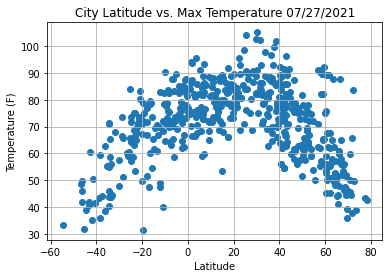

In [87]:
#plot Temperature (F) vs. Latitude





plt.scatter(weather_df['Latitude'], weather_df['Max Temp'], marker = 'o')
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

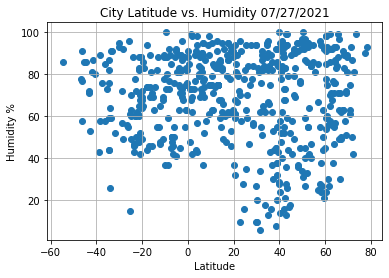

In [88]:
# * Humidity (%) vs. Latitude
plt.scatter(weather_df['Latitude'],weather_df['Humidity'], marker ='o')
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

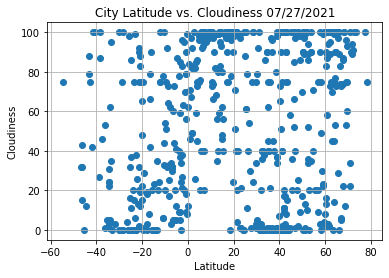

In [89]:
# * Cloudiness (%) vs. Latitude
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'], marker ='o')
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

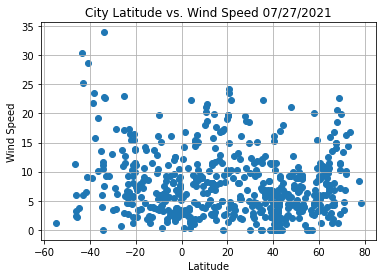

In [112]:
# * Wind Speed (mph) vs. Latitude
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'], marker ='o')
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

In [113]:
#northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
#southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

northern_df = weather_df.loc[weather_df["Latitude"]> 0,]
southern_df = weather_df.loc[weather_df["Latitude"]< 0,]

In [114]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:-0.3840608905335808
intercept:87.39544522199981
rvalue (Correlation coefficient):-0.5724502806475249
pandas (Correlation coefficient):-0.57
stderr:0.02792725324298932
y = -0.38x + 87.4


The r-squared is: 0.32769932381343003


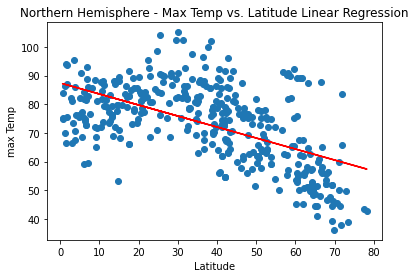

In [116]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.
plt.show()

In [117]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:0.7249733453514485
intercept:79.91812001779059
rvalue (Correlation coefficient):0.7027938355014375
pandas (Correlation coefficient):0.7
stderr:0.05730362724615189
y = 0.72x + 79.92


The r-squared is: 0.49391917521882156


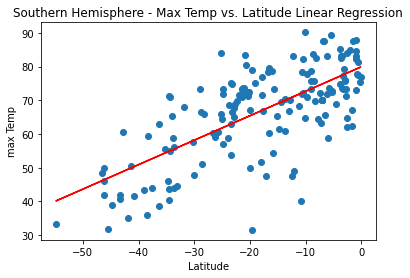

In [118]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [119]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:-0.10112527825156194
intercept:72.92777024246175
rvalue (Correlation coefficient):-0.08954696522340083
pandas (Correlation coefficient):-0.09
stderr:0.05710113573213072
y = -0.1x + 72.93


The r-squared is: 0.008018658980720957


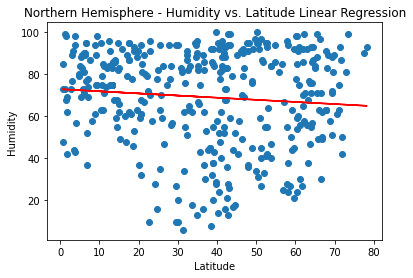

In [120]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [121]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:0.048991164008054554
intercept:70.1003569321776
rvalue (Correlation coefficient):0.03801005775956871
pandas (Correlation coefficient):0.04
stderr:0.10057345070880569
y = 0.05x + 70.1


The r-squared is: 0.0014447644908857497


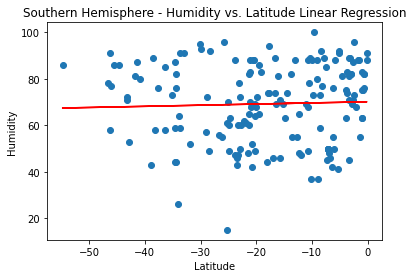

In [122]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [123]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:-0.2812257641635526
intercept:69.46967674307083
rvalue (Correlation coefficient):-0.14923203298284007
pandas (Correlation coefficient):-0.15
stderr:0.09459901480331362
y = -0.28x + 69.47


The r-squared is: 0.02227019966819147


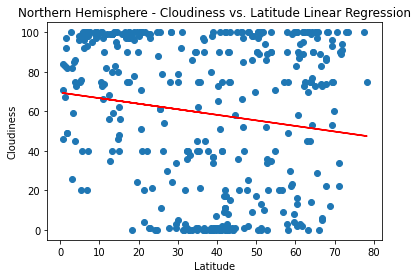

In [124]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [125]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:0.05438051891839216
intercept:40.93917321389632
rvalue (Correlation coefficient):0.021682887692562675
pandas (Correlation coefficient):0.02
stderr:0.19579526632638455
y = 0.05x + 40.94


The r-squared is: 0.00047014761868828596


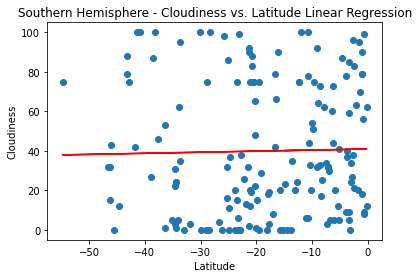

In [126]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [127]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:-0.014155883606835253
intercept:8.171647157945866
rvalue (Correlation coefficient):-0.054034367261664364
pandas (Correlation coefficient):-0.05
stderr:0.013280551645820815
y = -0.01x + 8.17


The r-squared is: 0.0029197128453684255


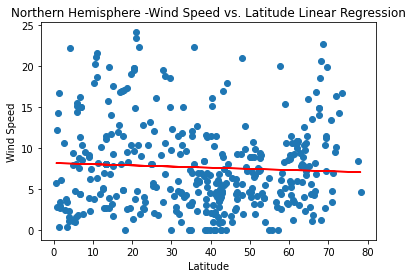

In [128]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere -Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [129]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)


slope:-0.14361973359655578
intercept:5.938737756791216
rvalue (Correlation coefficient):-0.31296009838825845
pandas (Correlation coefficient):-0.31
stderr:0.03403454643766221
y = -0.14x + 5.94


The r-squared is: 0.0979440231831884


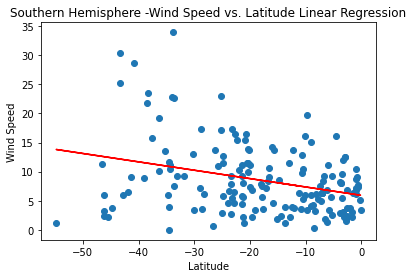

In [130]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere -Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()